In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
#Basic libraries needed

In [2]:
vidgames = pd.read_csv("vidgames_cleaned.csv")

Note that for the below dataset, data has been scraped and reorganised, leaving only the relevant data behind. For the rest of our project, we will use this csv file to make any data analysis.

In [3]:
vidgames.drop(labels="Unnamed: 0", axis="columns", inplace=True)
vidgames

,Name,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,007: Quantum of Solace,2008.0,Action,Activision,1.82,64.563380,71.0,6.653906,128.0,Treyarch,T
1,18 Wheeler: American Pro Trucker,2002.0,Racing,Acclaim Entertainment,0.11,52.000000,17.0,6.800000,8.0,Acclaim Studios Cheltenham,E
2,187: Ride or Die,2005.0,Racing,Ubisoft,0.06,51.000000,40.0,6.900000,8.0,Ubisoft Paris,M
3,2002 FIFA World Cup,2002.0,Sports,Electronic Arts,0.24,78.653846,26.0,8.220000,10.0,EA Sports,E
4,2010 FIFA World Cup South Africa,2010.0,Sports,Electronic Arts,1.73,78.593407,91.0,7.821795,78.0,Electronic Arts,E
...,...,...,...,...,...,...,...,...,...,...,...
4425,de Blob 2,2011.0,Platform,THQ,0.21,74.000000,50.0,7.100000,34.0,Blue Tongue Entertainment,E10+
4426,echochrome,2008.0,Puzzle,Sony Computer Entertainment,0.09,79.000000,28.0,7.700000,13.0,"SCE/WWS, SCE Japan Studio",E
4427,htoL#NiQ: The Firefly Diary,2014.0,Platform,Nippon Ichi Software,0.01,58.000000,16.0,7.700000,23.0,Nippon Ichi Software,T
4428,nail'd,2010.0,Racing,Deep Silver,0.12,66.000000,36.0,6.200000,13.0,Techland,E10+


# Problem Formulation
----------

## Problem: Predicting Global Sales of Video Games and the Usefulness of Predictors

From our cleaned dataset, we can see the whole list of video games, and their corresponding statistics.

We will be taking **Global Sales** to be the **response variable**, to represent the popularity and success of the game.

<br>

1. This can be achieved by referring to the **Critic Score, Critic Count, User Score, User Count as numeric predictors**. 
- Based on how critics and users have scored a particular video game, we understand that customer perception of the game may influence the popularity of the game and whether people will be inclined to purchase the game.

<br>


2. We understand that there are also non-numeric variables which may help us to predict Global Sales. As such, we will refer to **Genre and Ratings as categorical predictors**. 

- Certain genres may be popular in general, which may explain why certain video games fare better compared to the rest. On the other hand, ratings may also advise video games buyers and influence their purchase decisions.



## Problem Statements

Given the nature of our dataset, together with the problem we have identified in this theme, here are the problem statements we have formulated:

1. **Are we able to predict Global Sales (Response) using other variables (Predictors) from our data?**
2. **What is the most important feature in predicting Global Sales? (Feature Importance)**
3. **Are we able to identify whether a video game is popular or not? (Classification)**

## Exploratory Data Analysis (EDA)
----------

Below is the basic information of our cleaned dataset:

In [4]:
vidgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4430 non-null   object 
 1   Year_of_Release  4430 non-null   float64
 2   Genre            4430 non-null   object 
 3   Publisher        4430 non-null   object 
 4   Global_Sales     4430 non-null   float64
 5   Critic_Score     4430 non-null   float64
 6   Critic_Count     4430 non-null   float64
 7   User_Score       4430 non-null   float64
 8   User_Count       4430 non-null   float64
 9   Developer        4430 non-null   object 
 10  Rating           4430 non-null   object 
dtypes: float64(6), object(5)
memory usage: 380.8+ KB


### How do we make sense of our data variables?

#### Name
- Name of video game (self-explanatory)

#### Year of Release
- Year in which the video game was first published (self-explanatory)

#### Genre
- Type of video game (E.g. Action, Sports, Shooter etc.)

#### Publisher
- Company or organisation which published the video game

#### Global Sales
- Taken as the sum of NA Sales (North America), EU Sales (Europe), JP Sales (Japan), and Other Sales (Other regions)

#### Critic Score
- Aggregate mean of the critic score given by professional critics on Metacritic

#### Critic Count
- Total count of professional critics on Metacritic sampled

#### User Score
- Aggregate mean of the user score given by subscribers on Metacritic

#### User Count
- Total count of subscribers on Metacritic sampled

#### Developer
- Company or organisation which created or developed the video game

#### Rating
- Ratings assigned by the Entertainment Software Rating Board (ESRB). They are in charge of assigning age and content ratings to video games

As mentioned above, we shall first extract the data of our numeric predictors.

In [5]:
GlobalSales = pd.DataFrame(vidgames['Global_Sales'])
CriticScore = pd.DataFrame(vidgames['Critic_Score'])
CriticCount = pd.DataFrame(vidgames['Critic_Count'])
UserScore = pd.DataFrame(vidgames['User_Score'])
UserCount = pd.DataFrame(vidgames['User_Count'])

NumericData = pd.DataFrame(vidgames[['Global_Sales','Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']])

NumericData

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1.82,64.563380,71.0,6.653906,128.0
1,0.11,52.000000,17.0,6.800000,8.0
2,0.06,51.000000,40.0,6.900000,8.0
3,0.24,78.653846,26.0,8.220000,10.0
4,1.73,78.593407,91.0,7.821795,78.0
...,...,...,...,...,...
4425,0.21,74.000000,50.0,7.100000,34.0
4426,0.09,79.000000,28.0,7.700000,13.0
4427,0.01,58.000000,16.0,7.700000,23.0
4428,0.12,66.000000,36.0,6.200000,13.0


In [6]:
NumericData.describe()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000
mean,0.430580,68.818975,28.117156,7.354293,39.668397
std,0.452122,12.130409,17.072807,1.170144,44.805059
min,0.010000,35.000000,4.000000,3.900000,4.000000
25%,0.110000,61.000000,15.000000,6.600000,10.000000
50%,0.260000,70.000000,25.000000,7.600000,22.000000
75%,0.580000,78.000000,38.000000,8.221304,50.000000
max,2.120000,98.000000,91.000000,9.600000,229.000000


The describe function gives us a breakdown of the numeric variables in short - here we can pinpoint the lower quartile, upper quartile, as well as the median values of each variable. From the outset, we can see that the standard deviation of User Count is **very** high, which suggests that the data is more spread out.

Since we have extracted all the relevant numeric data, we can use a boxplot to take a look at the data.

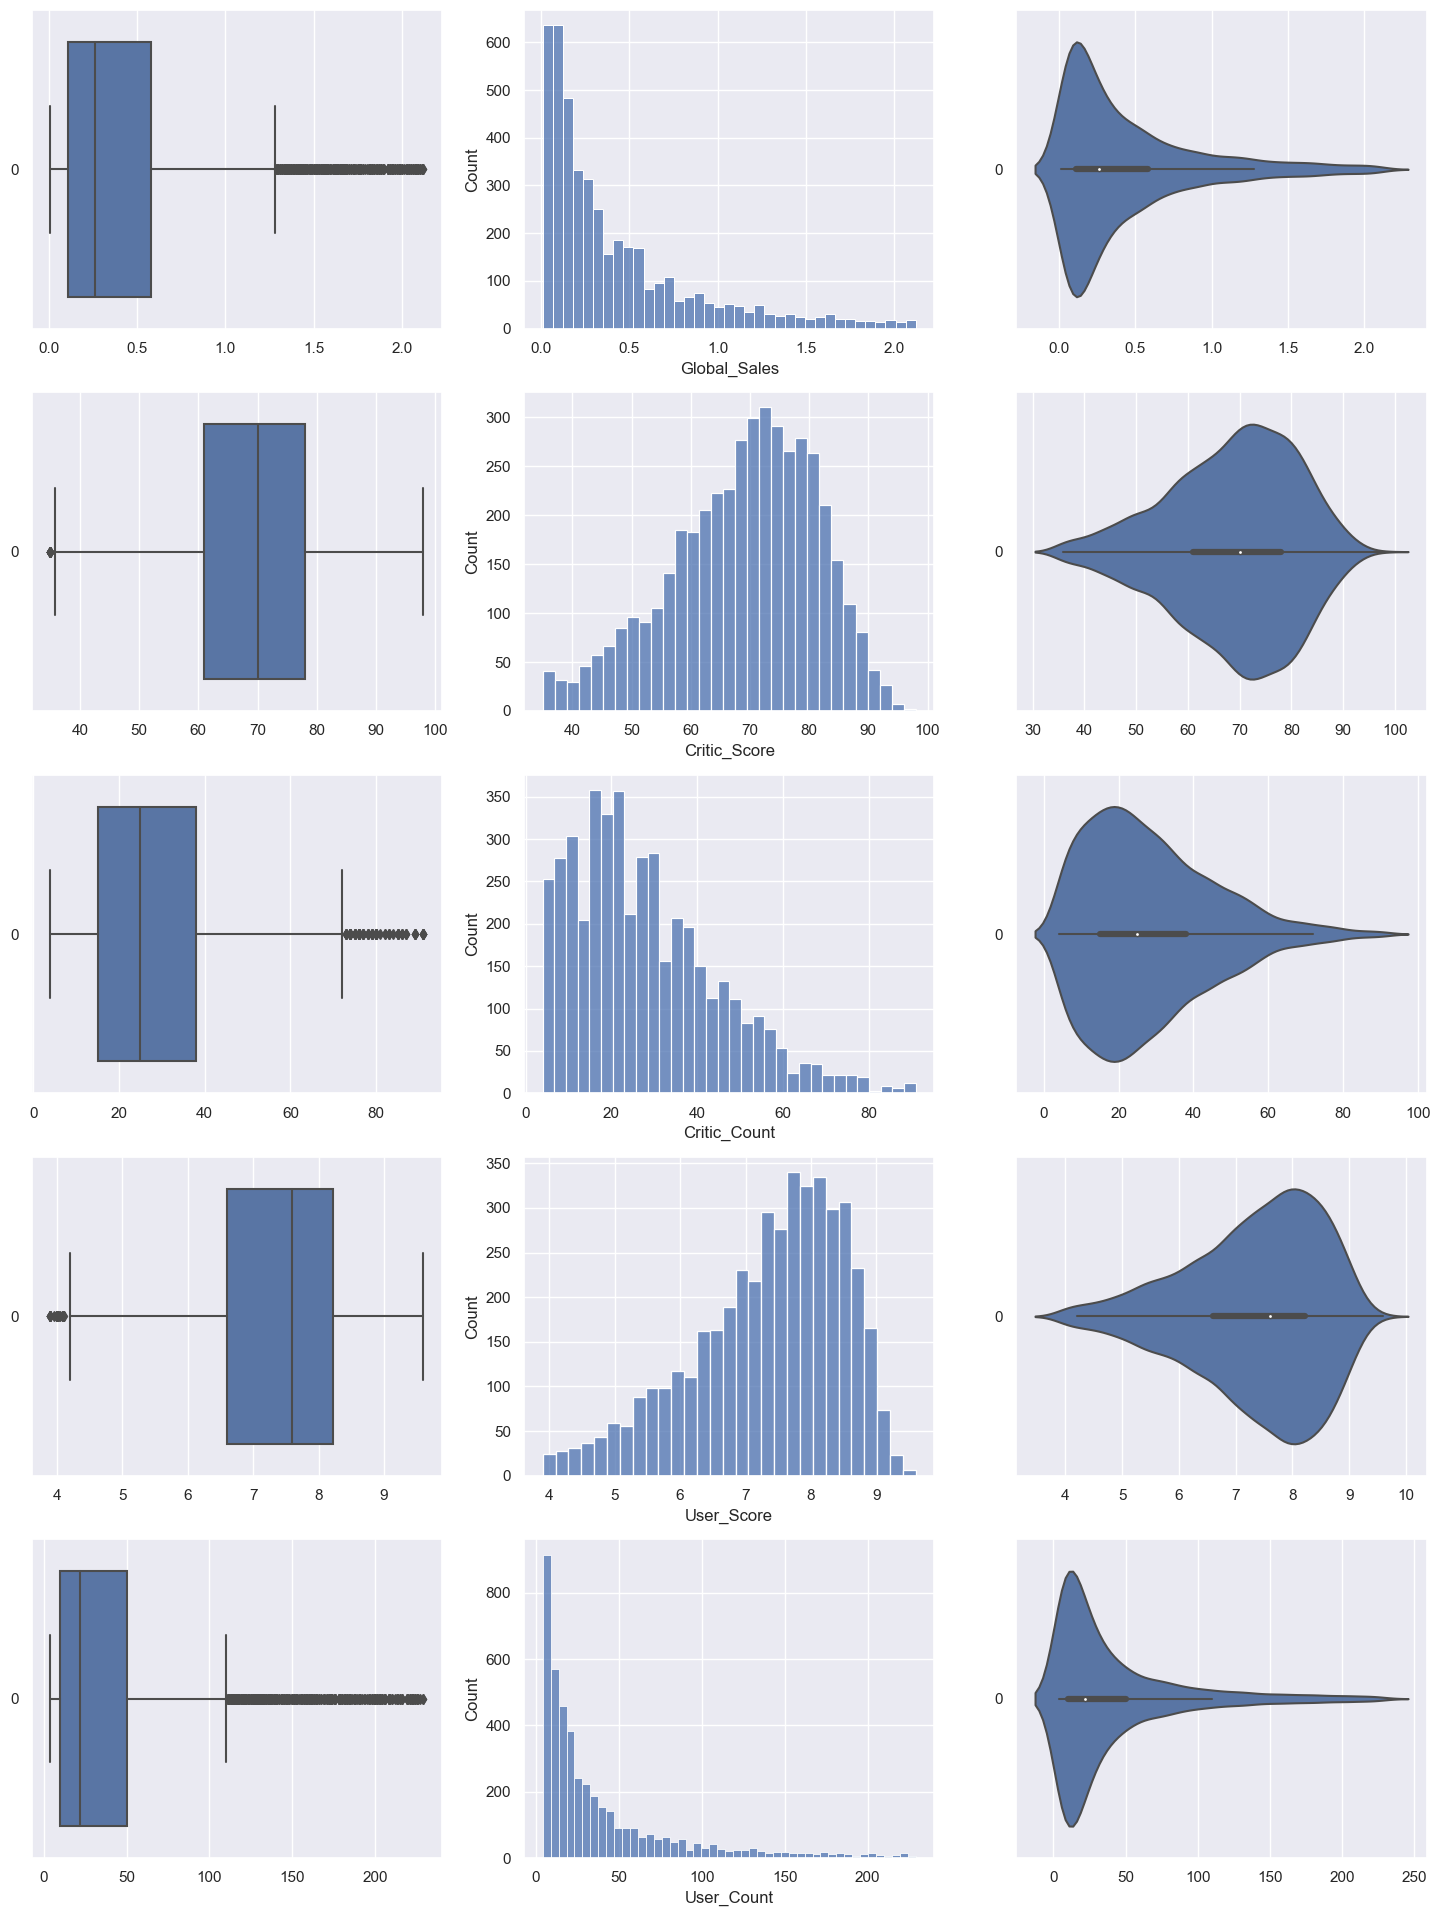

In [7]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

We can see that Global Sales, Critic Count and User Count still have many outliers even after an initial round of outlier removals. Nevertheless, it is fine due to the nature of the dataset (**Long Tail**) - some video games may be just so popular which explains the skew in the data points.

On the other hand, User Score has a slight positive skew which shows that subscribers on Metacritic tend to give video games a more positive rating. Finally, we have Critic Score with the most even distribution (even though it is not a normal distribution). Compared to most of the other variables, the skew is lower for Critic Score. We can infer that the scoring by critics may not be too strict or too lenient, or else there would be a skew on either tail.

              Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count
Global_Sales      1.000000      0.271993      0.304892    0.125193    0.297112
Critic_Score      0.271993      1.000000      0.289702    0.547628    0.297101
Critic_Count      0.304892      0.289702      1.000000    0.107399    0.503452
User_Score        0.125193      0.547628      0.107399    1.000000    0.112689
User_Count        0.297112      0.297101      0.503452    0.112689    1.000000


<AxesSubplot:>

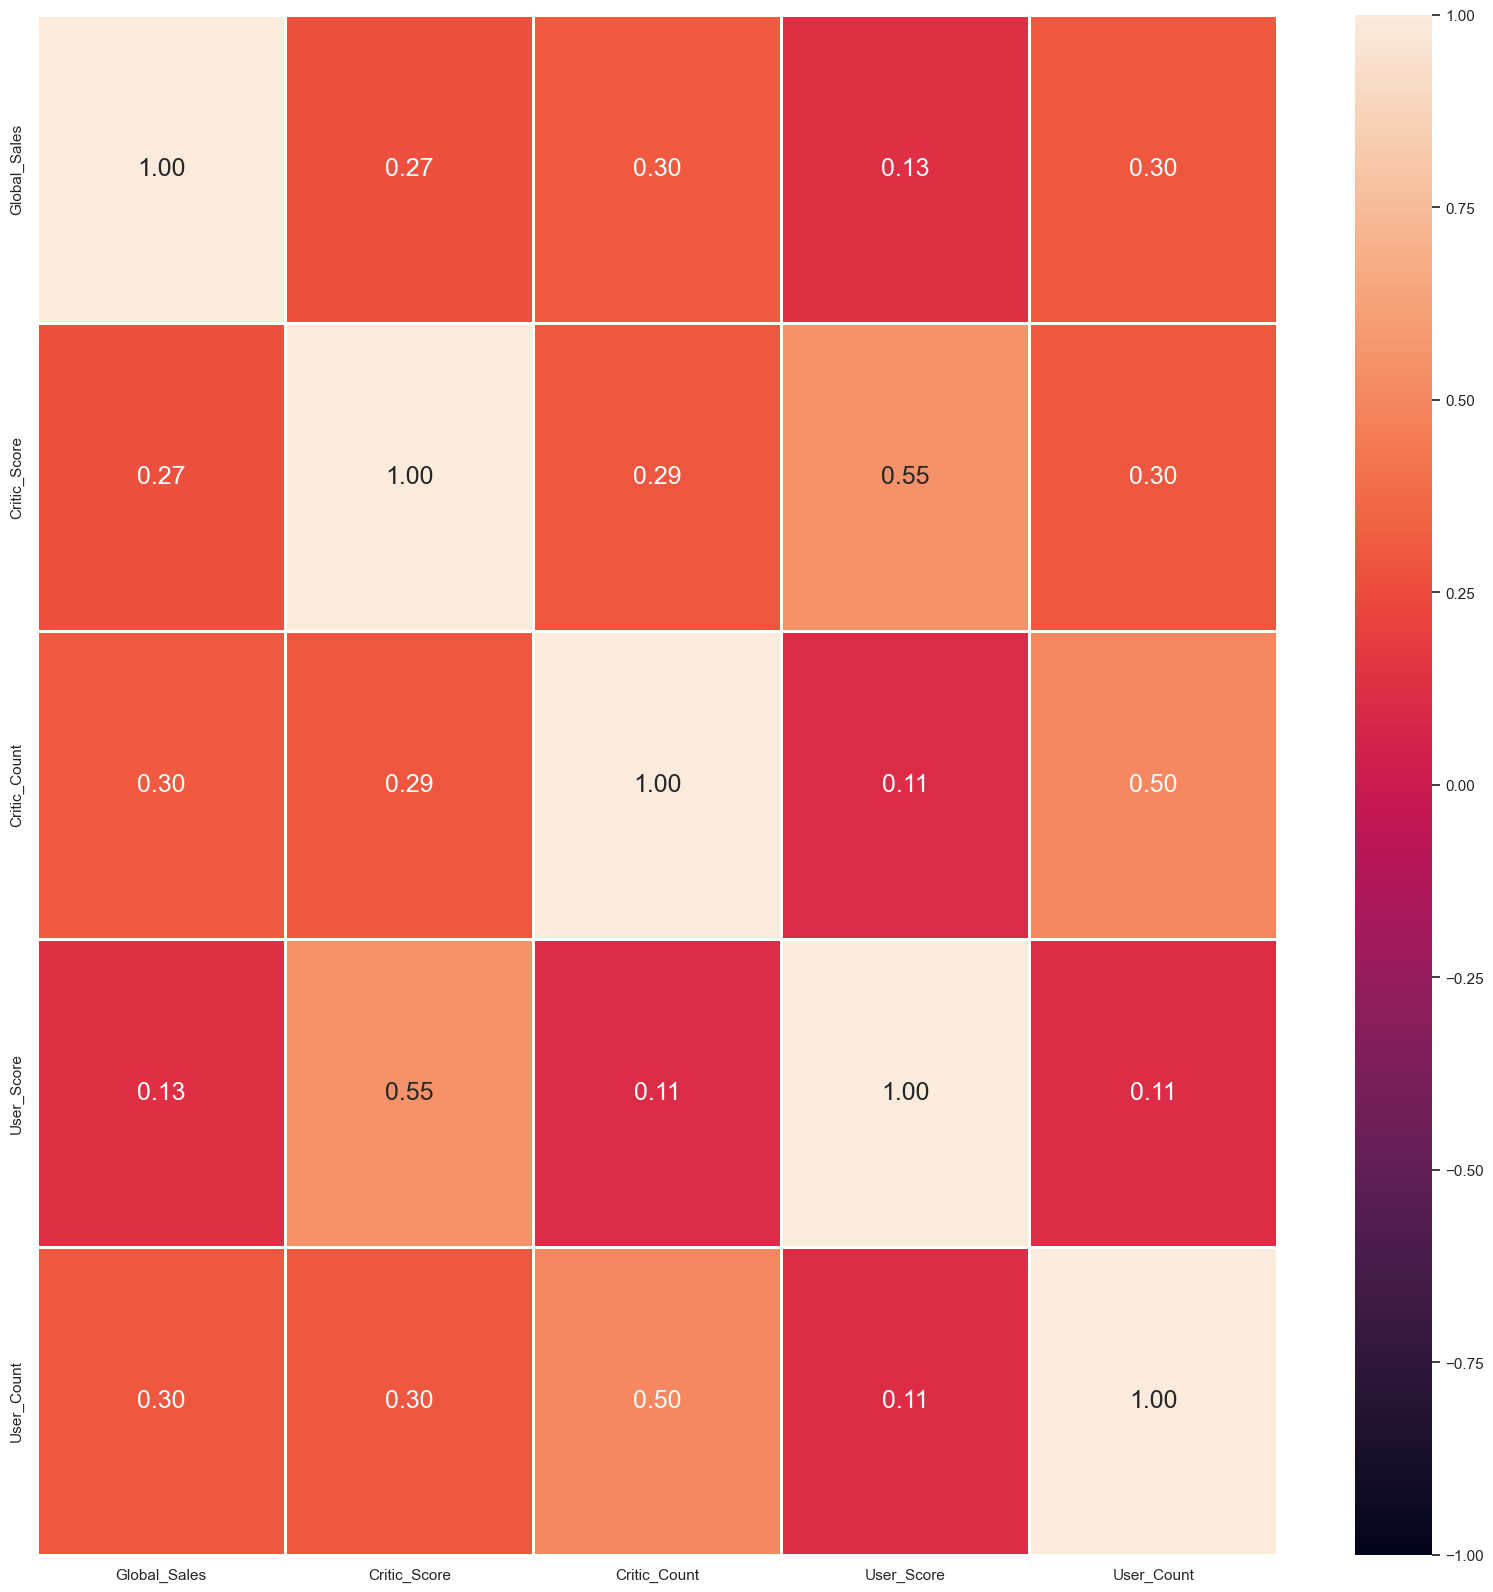

In [8]:
# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

As it appears from the heatmap above, Critic_Count (number of critic scorers) and User_Count (number of user scorers) have the highest correlation with Global_Sales. This is also shown from the $R^{2}$ values of 0.30 and 0.30 respectively.

Maybe we should consider taking a closer look at these predictors...

To further inspect these predictors, we shall use a scatterplot.

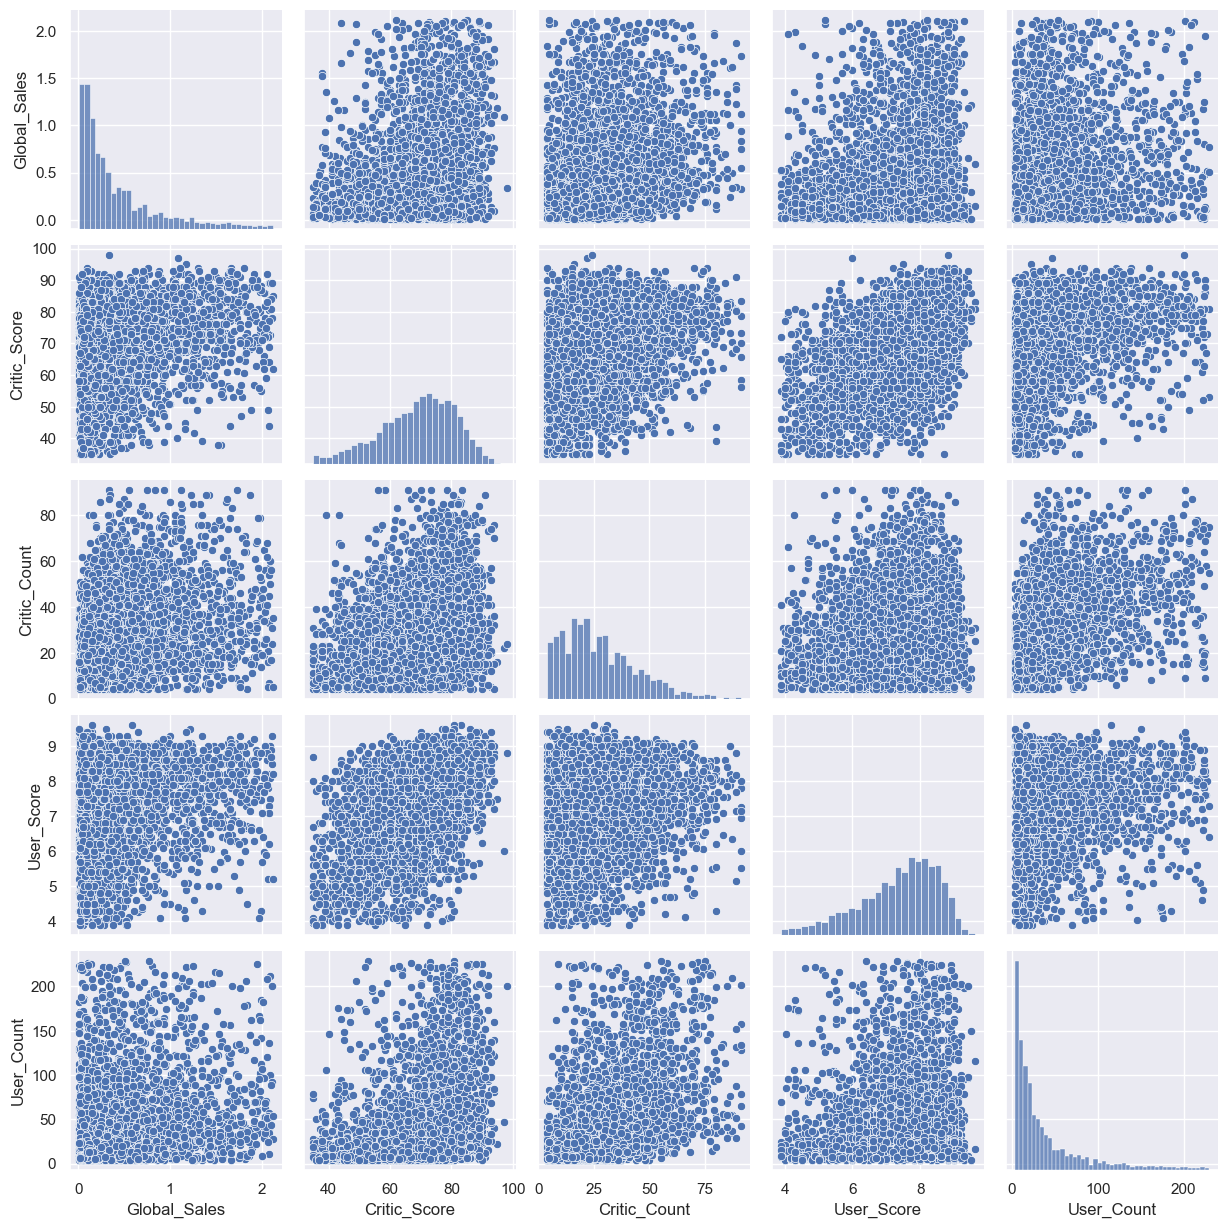

In [9]:
sb.pairplot(data = NumericData)

It can be seen from the above pairplot that the correlation is not very high between the variables. Furthermore, the large sample size makes the cluster much bigger. Therefore, purely based on the scatterplots, it is somewhat inconclusive to determine the correlation between Global Sales and the numeric predictors.

Having seen the data visualisation for our numeric predictors, we should also take a look at the categorical predictors.

Number of Genres : 12
Action          910
Sports          621
Role-Playing    512
Shooter         465
Racing          393
Fighting        289
Platform        266
Misc            260
Simulation      222
Adventure       199
Strategy        192
Puzzle          101
Name: Genre, dtype: int64


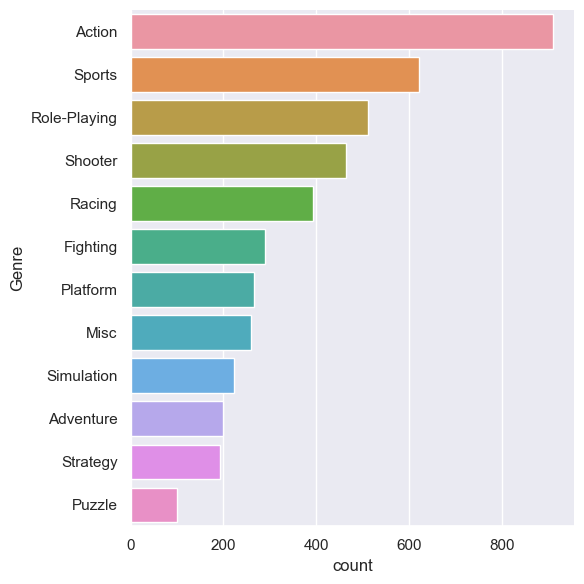

In [10]:
# Genres in the Dataset
print("Number of Genres :", len(vidgames["Genre"].unique()))

# Video Games of each Genre
print(vidgames["Genre"].value_counts())
sb.catplot(y = "Genre", data = vidgames, kind = "count", order = vidgames["Genre"].value_counts().index, height = 6)

As seen from above, there are 12 types of genres of video games categorised, with **Action** video games having the highest output. i.e., Action games are likely to be the most common in the video game industry as there are more than 800 action games within this sample.

Number of Ratings : 6
T       1683
E       1457
M        709
E10+     579
K-A        1
RP         1
Name: Rating, dtype: int64


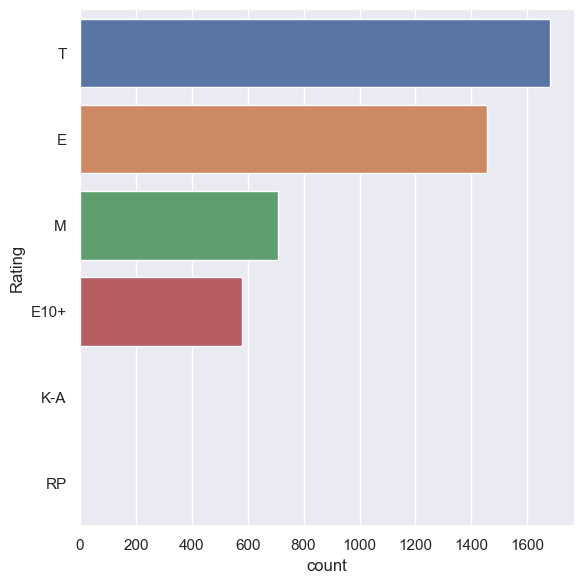

In [11]:
# Primary Types in the Dataset
print("Number of Ratings :", len(vidgames["Rating"].unique()))

# Pokemons of each Primary Type
print(vidgames["Rating"].value_counts())
sb.catplot(y = "Rating", data = vidgames, kind = "count", order = vidgames["Rating"].value_counts().index, height = 6)

Above, we see the category plot for the count of video games and their corresponding content/age ratings.
- E: Everyone (suitable for all ages)
- E10+: Everyone 10+ (suitable for ages 10 and above)
- T: Teen (suitable for ages 13 and above)
- M: Mature 17+ (suitable for ages 17 and above)
- K: Kids to Adult (now known as E)
- RP: Rating Pending (not yet assigned a rating, but anticipated to be M)

<br>

It seems that video games under "Teen" and "Everyone" are the most common based on the catplot above. This certainly makes sense, because these 2 categories are more inclusive; a wider age demographics is able to play these games!

To put it into better perspective, we shall take a look at the distribution of video games' content/age ratings and their genres.

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

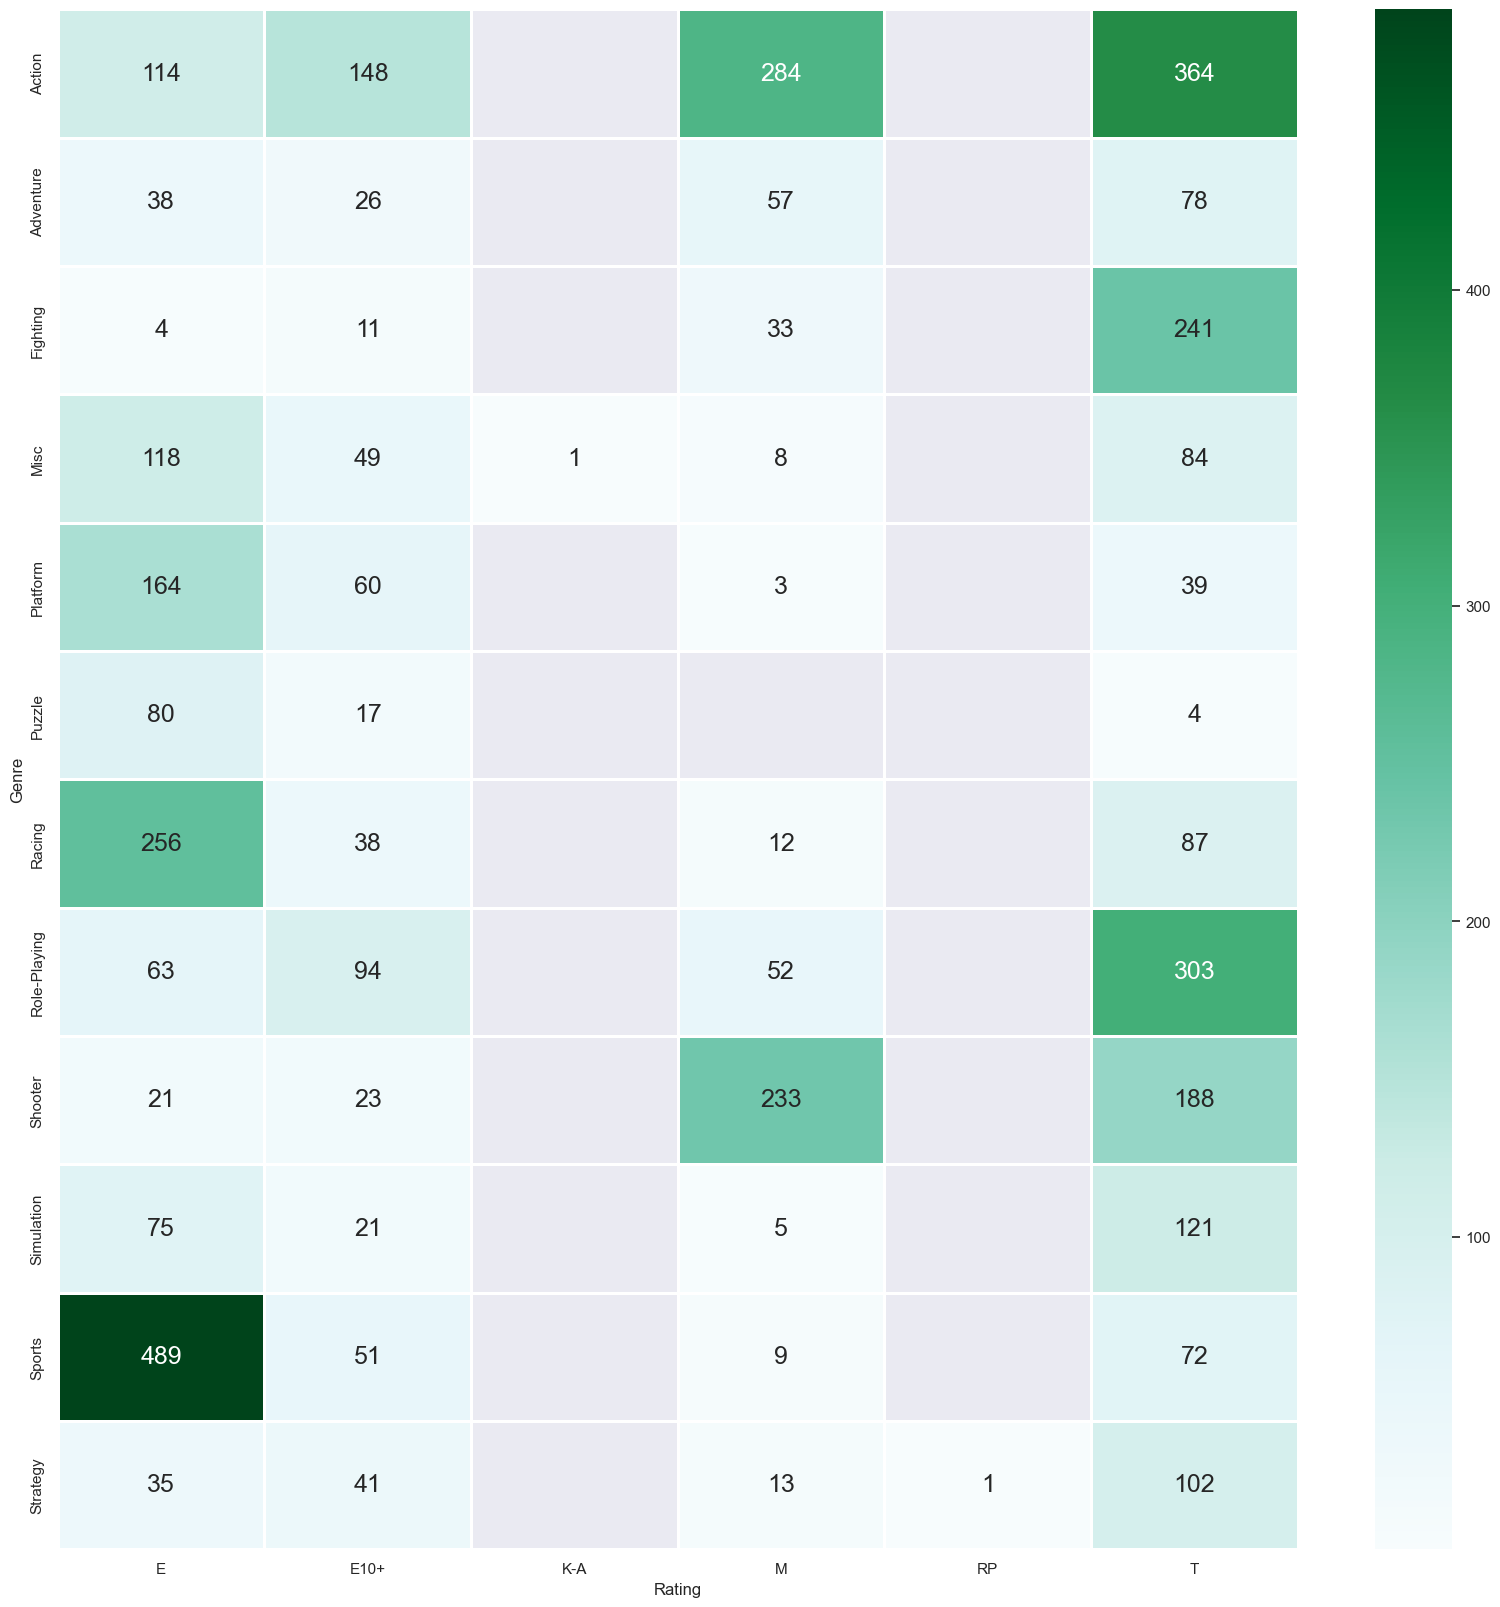

In [12]:
# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(vidgames.groupby(['Genre', 'Rating']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt = 'g')

We can see that the most common video games by genre and rating are:
1. Sports + E
2. Action + T
3. Role-Playing + T

<br>

And so on...

We could perhaps guess that these games are more popular, with the higher supply of video games from these genres/ratings. Therefore, it is possible that these genres/ratings have a bigger market and higher demand, such that more video games are created under these genres/ratings.

After looking at the distribution of video games and their categories, we are surely curious how they fare based on Global Sales.

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

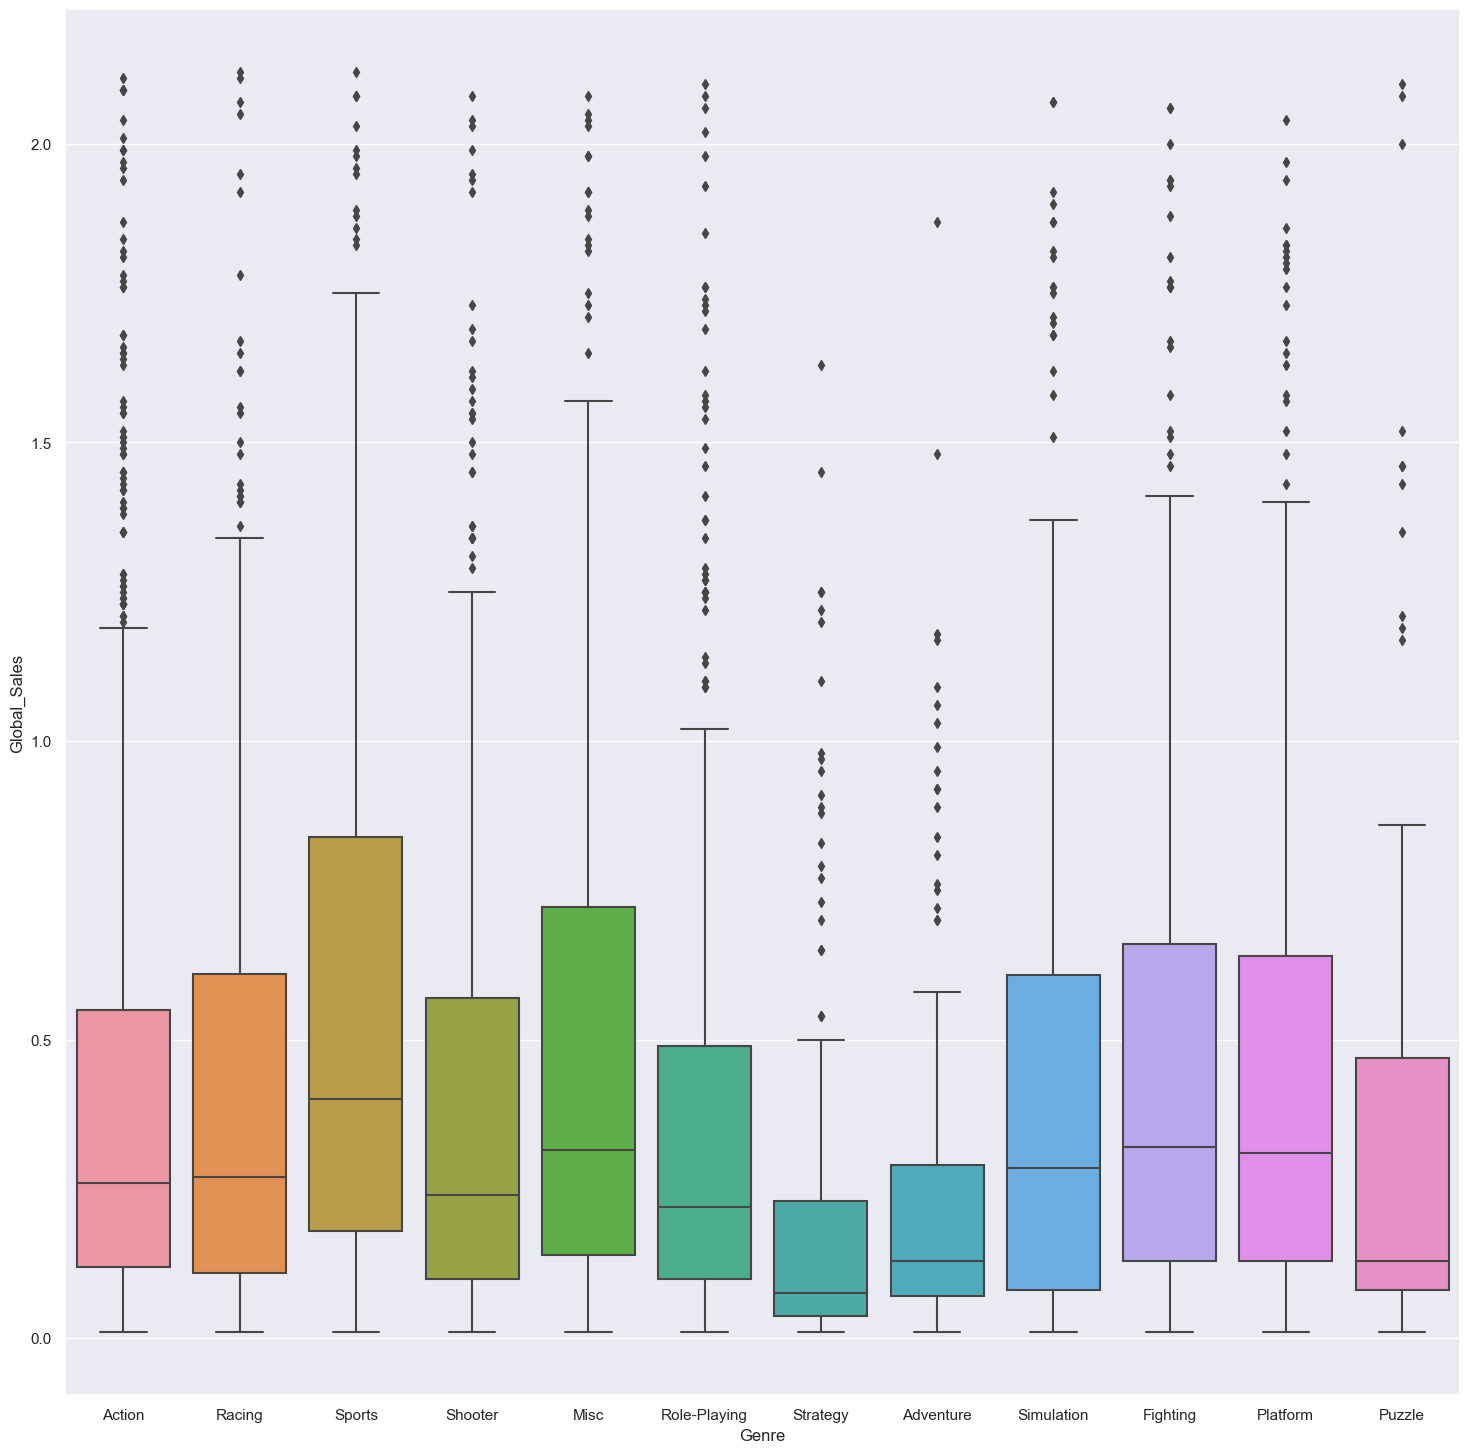

In [13]:
GlobalSales = vidgames['Global_Sales']
Genre = vidgames['Genre']
jointDF = pd.concat([GlobalSales, Genre], axis = 1)
f = plt.figure(figsize=(18, 18))
sb.boxplot(y = "Global_Sales", x = "Genre",  data = jointDF)

Hmm.... it looks like based on the genre of the video games, the medians appear to be varying. Therefore, it is possible that the genre of the video game may impact how popular a video game will turn out to be.

<br>

Sports seems to fare the best among all the other genres of video games, with its median significantly higher than the rest. Conversely, Strategy games seems to fare the worst, with its median being much lower than that of other genres. 

<AxesSubplot:xlabel='Rating', ylabel='Global_Sales'>

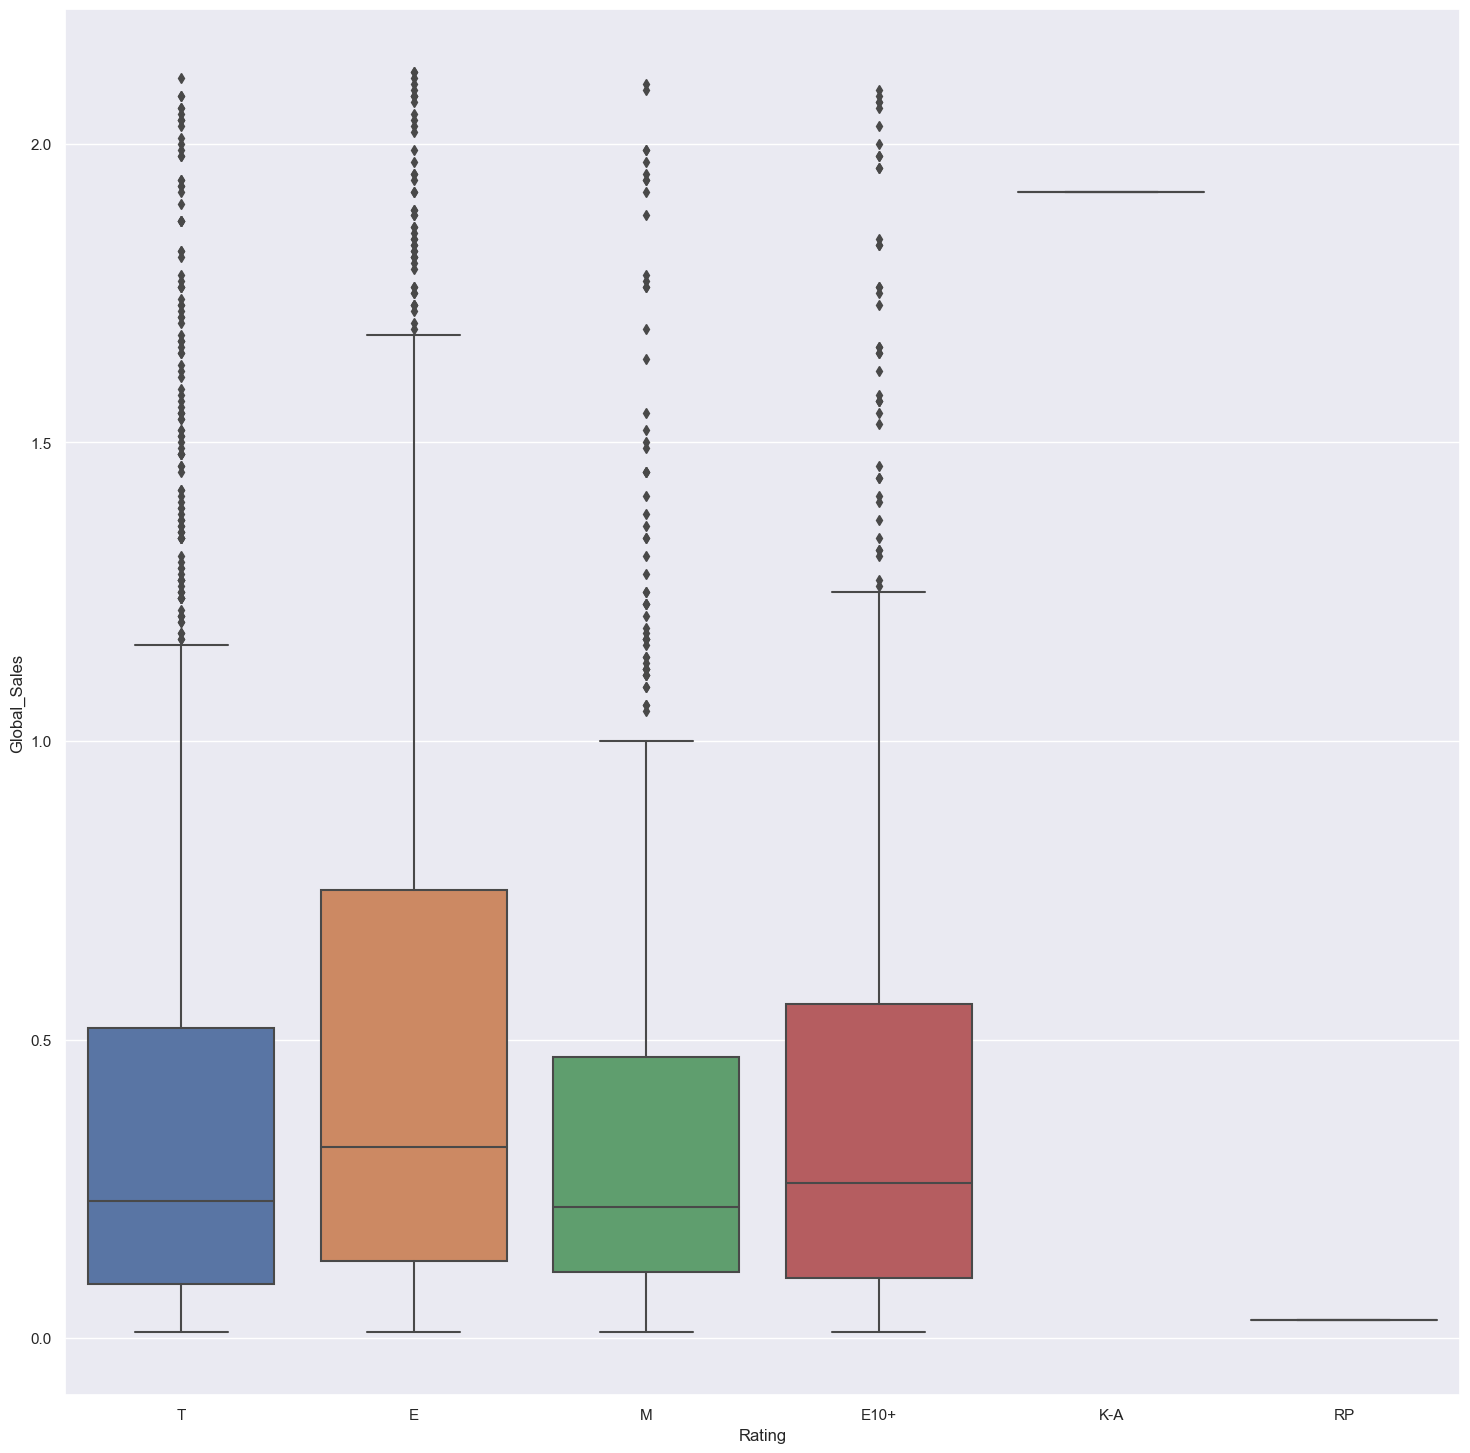

In [14]:
GlobalSales = vidgames['Global_Sales']
Rating = vidgames['Rating']
jointDF = pd.concat([GlobalSales, Rating], axis = 1)
f = plt.figure(figsize=(18, 18))
sb.boxplot(y = "Global_Sales", x = "Rating",  data = jointDF)

In this case, we see that the medians of each rating seem to be relatively invariant, so there appears to be no correlation between the rating and the popularity of the video game. Nevertheless, we can see that each genre has MANY outliers, due to them being popular games and raking in high profits in Global Sales. 

Therefore, the ratings may not necessarily influence the popularity of the game and each rating has games which can still sell well on the global market.

Having taken a detailed look at our predictors, the anaylsis seems to be somewhat inconclusive. To investigate the predictors in detail, we shall use regression and classification models to do further testing. Perhaps those models are able to give a more in-depth analysis of the video games.